# Gathering images

## AKB48
<img src="akb_photo.png">

## Nogizaka46
<img src="46_photo.png">



## Ordinary people
<img src="people_photo.png">

# Resize（75 x 75 pixel）

In [ ]:
import numpy as np
from PIL import Image
import os, glob, random

#変数の初期化
photo_size = 75   #画像サイズ
X = []#画像データを格納するリスト
y = []#ラベルデータを格納するリスト


def glob_images2(path, label, max_photo, rotate):
    files = glob.glob(path + "/*.png")#ファイルの一覧を得る
    random.shuffle(files)
    used_file={}
    #各ファイルを処理
    i = 0
    for f in files:
        if i >= max_photo: break
        if f in used_file: continue# 同じファイルを使わない
        used_file[f] = True
        i += 1
        #画像ファイルを読む
        img = Image.open(f)
        img = img.convert('RGB')#色空間をRGBに合わせる
        #同一サイズにリサイズ
        img = img.resize((photo_size, photo_size))
        X.append(image_to_data(img))
        y.append(label)
        if not rotate: continue
        #角度を少しずつ変えた画像を追加
        for angle in range(-20, 21, 5):
            #角度を変更
            if angle != 0:
                img_angle = img.rotate(angle)
                X.append(image_to_data(img_angle))
                y.append(label)
                #反転
                img_r = img_angle.transpose(Image.FLIP_LEFT_RIGHT)
                X.append(image_to_data(img_r))
                y.append(label)

def image_to_data(img):#画像データを正規化
    data = np.asarray(img)
    data = data / 256
    data = data.reshape(photo_size, photo_size, 3)
    return data

#最大枚数max_photoのデータセットを作る
def make_dataset2(max_photo, outfile, rotate):
    global X
    global y
    X = []
    y = []
    #各画像のフォルダーを読む
    glob_images2("./new_AKB", 0, max_photo, rotate)
    glob_images2("./new_46", 1, max_photo, rotate)
    glob_images2("./new_people", 2, max_photo, rotate)
    X = np.array(X, dtype=np.float32)
    np.savez(outfile, X=X, y=y)
    print("saved:" + outfile)

#データセットを作成する
make_dataset2(100, "photo-min2.npz", rotate=True)
make_dataset2(100, "photo-test.npz", rotate=False)

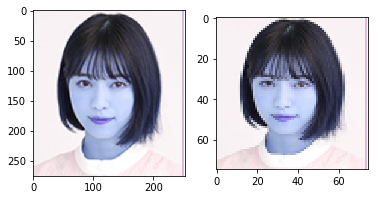

In [19]:
import cv2 # OpenCVはcv2という名称で扱われる
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


img = cv2.imread("nishino.png")

# 画像のリサイズ
resized = cv2.resize(img, (75, 75))

# # リサイズを行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# リサイズを行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(resized)

# Do train

In [2]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.utils import np_utils
import numpy as np

#変数の宣言
classes = 3 #いくつに分類するか
data_size = 75 * 75 * 3 #縦75 x 横75 x 3原色

#データを学習、モデルを評価
def main():
  #読み込み
    data = np.load("./photo-min2.npz")
    X = data["X"] #画像データ
    y = data["y"] #ラベル
    #テストデータの読み込み
    data = np.load("./photo-test.npz")
    X_test = data["X"]
    y_test = data["y"]
    #高次元行列を２次元へ
    X = np.reshape(X, (-1, data_size))
    #訓練とテストデータ
    X_test = np.reshape(X_test, (-1, data_size))
    print()
    #モデル訓練して評価
    model = train(X, y)
    model_eval(model, X_test, y_test)

#モデルを構築しデータを学習する
def train(X, y):
    model = Sequential()
    model.add(Dense(units=64, input_dim=(data_size)))
    model.add(Activation('relu'))
    model.add(Dense(units=classes))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    model.fit(X, y, epochs=30)
    #model.save_weights("girl.hdf5")
    return model

#モデル評価
def model_eval(model, X_test, y_test):
    score = model.evaluate(X_test, y_test)
    #print("loss:", score[0]*100, "%")
    print("accuracy:", score[1]*100, "%")#全体正解率（予測に対してどれくらい当たってたか）

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# The model of Machine Learning

## neural network
<img src="neural.png">

## relu function
<img src="relu.png">

## sigmoid function
<img src="sigmoid.png">

# Do test

In [5]:
if __name__=="__main__":
    main()


Epoch 1/30
5100/5100 [==============================] - 3s 510us/step - loss: 1.0362 - acc: 0.5400
Epoch 2/30
5100/5100 [==============================] - 2s 427us/step - loss: 0.7835 - acc: 0.6592
Epoch 3/30
5100/5100 [==============================] - 2s 423us/step - loss: 0.7057 - acc: 0.7037
Epoch 4/30
5100/5100 [==============================] - 2s 441us/step - loss: 0.6392 - acc: 0.7312
Epoch 5/30
5100/5100 [==============================] - 2s 454us/step - loss: 0.5856 - acc: 0.7610
Epoch 6/30
5100/5100 [==============================] - 2s 469us/step - loss: 0.5709 - acc: 0.7722
Epoch 7/30
5100/5100 [==============================] - 2s 483us/step - loss: 0.5050 - acc: 0.8006
Epoch 8/30
5100/5100 [==============================] - 2s 443us/step - loss: 0.4648 - acc: 0.8159
Epoch 9/30
5100/5100 [==============================] - 2s 440us/step - loss: 0.4531 - acc: 0.8284
Epoch 10/30
5100/5100 [==============================] - 2s 442us/step - loss: 0.4033 - acc: 0.8424
Epoch 11

# Check

### 乃木坂４６（Not used for Learning）
<img src="yoda.png">

### AKB48（Not used for Learning）
<img src="akb_2.png">

In [25]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from PIL import Image
import numpy as np, sys

classes = 3
photo_size = 75
data_size = photo_size * photo_size * 3
labels = ["48系統", "46系統", "普通の人"]

def build_model():
    model = Sequential()
    model.add(Dense(units=64, input_dim=(data_size)))
    model.add(Activation('relu'))
    model.add(Dense(units=classes))
    model.add(Activation('softmax'))
    model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'])
    model.load_weights('girl.hdf5')
    return model

def check(model, fname):
    img = Image.open(fname)
    img = img.convert('RGB')
    img = img.resize((photo_size, photo_size))
    data = np.asarray(img).reshape((-1, data_size)) / 256

    res =model.predict([data])[0]
    y = res.argmax()
    per = int(res[y] * 100)
    print("{0} ({1} %)".format(labels[y], per))

if len(sys.argv) <= 1:
    print("check.py ファイル名")
    quit()

model = build_model()
check(model, sys.argv[1])

FileNotFoundError: [Errno 2] No such file or directory: '-f'